<a href="https://colab.research.google.com/github/Antony-gitau/probabilistic_AI_playgraound/blob/main/Introduction_to_Pyro_modelling_language_and_inference_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is a collection of examples and notes of my pursuit to understand how to model probablistic machine learning algorithmns using a python based language --pyro.

terms:
- Pyro is a probablistic programming language (PPL) based on python and pytorch. 

- probabilistic machine learning algorithmms - models that are built in the language of probability.

- probability is the mathematics of reasoning under uncertainity. 

- probabilistic program - a mixture of deterministic computation and randomly sampled values. 

- A latent variable is one that cannot be directly observed but is estimated based on a series of observed variables. In pyro, these variables are graphically represented as unshaded nodes.

- Inference is drawing conclusions about latent variable from the data.

- prior probability - it is the probability before evidence is taken into account.

- posterior distribution is the result of updating the likelihood infomation (or evidence) to prior probability.



In [3]:
%%capture
!pip install -q --upgrade pyro-ppl torch
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyro

We got this data from the [pyro documenatation page](https://pyro.ai/examples/intro_long.html#).

In [4]:
DATA_URL = "https://d2hg8soec8ck9v.cloudfront.net/datasets/rugged_data.csv"
data = pd.read_csv(DATA_URL, encoding="ISO-8859-1")

# we only want to investigate the ruggedness index, GPD per capital 
#of countries in Africa or not
df = data[["cont_africa", "rugged", "rgdppc_2000"]]

In [5]:
df.head()

,cont_africa,rugged,rgdppc_2000
0,0,0.462,NaN
1,0,2.518,NaN
2,1,0.858,1794.729
3,0,0.013,NaN
4,0,3.427,3703.113


We are filtering out the rows under column `rgdppc_2000`that are non-finite, meaning they are NaN or infinity.

We make these changes to our dataframe which results into columns with only finite values.

In [14]:

df =df[np.isfinite(df['rgdppc_2000'])]
df.head(10)

,cont_africa,rugged,rgdppc_2000
2,1,0.858,1794.729
4,0,3.427,3703.113
7,0,0.769,20604.460
8,0,0.775,12173.680
9,0,2.688,2421.985
11,0,0.006,10022.030
12,0,0.143,25417.440
13,0,3.513,28987.840
14,0,1.672,2570.944
15,1,1.780,621.652


We then convert the finite values in the `rgdppc_2000` to natural log. We do so normalize the data or reduce the influence of extreme values.

In [17]:
df["rgdppc_2000"] = np.log(df["rgdppc_2000"])
df.head(10)

,cont_africa,rugged,rgdppc_2000
2,1,0.858,0.700082
4,0,3.427,0.744884
7,0,0.769,0.831120
8,0,0.775,0.807126
9,0,2.688,0.719371
11,0,0.006,0.797762
12,0,0.143,0.840188
13,0,3.513,0.845730
14,0,1.672,0.723081
15,1,1.780,0.621299


In [35]:
values = df.values
print(values.shape)
print(values.dtype)

(170, 3)
float64


We want to convert the numpy arrays above in the dataframe, df to torch tensors for processing in pytorch and pyro.

To do that, we first get all the numpy array ,`df.values`, and pass them through the ,`torch.tensor function`, as we specify the type of torch tensors as floating points. 

We then assign the three variables (columns) the appropriate tensors.

In [31]:
train = torch.tensor(df.values, dtype=torch.float)
is_cont_africa, ruggedness, log_gdp = train[:, 0], train[:, 1], train[:, 2]

In [37]:
train.shape

torch.Size([170, 3])

Let's try to visualize our data.

1. A scatter plot of african nation rugged index on x axis and their GDPs on the y axis.

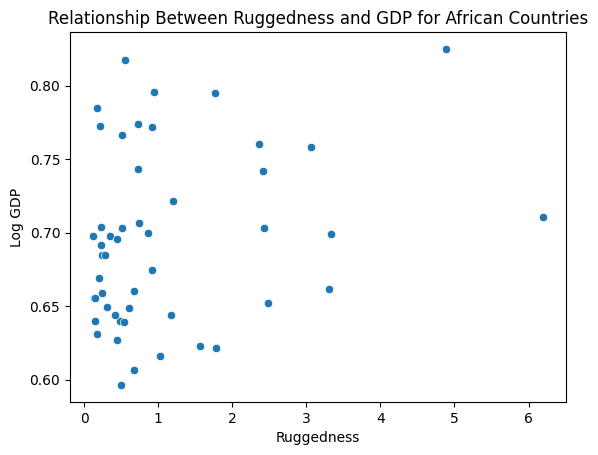

In [42]:
# Create a subset of the original dataframe containing only African countries
african_countries = df[df['cont_africa'] == 1]

# Create a scatter plot of ruggedness vs. log GDP for African countries
sns.scatterplot( x = african_countries['rugged'],
                y = african_countries['rgdppc_2000'])


# Set the plot title and axis labels
plt.title('Relationship Between Ruggedness and GDP for African Countries')
plt.xlabel('Ruggedness')
plt.ylabel('Log GDP')

# Display the plot
plt.show()

We can use the above code to plot for non- african countries as well.

Text(0, 0.5, 'Log GDP')

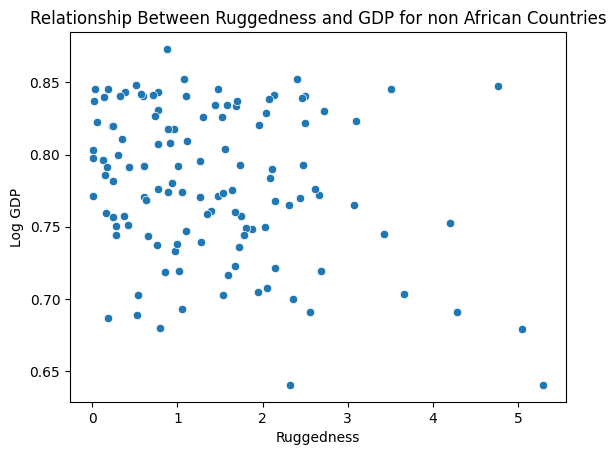

In [43]:
# Create a subset of the original dataframe containing only African countries
non_african_countries = df[df['cont_africa'] == 0]

# Create a scatter plot of ruggedness vs. log GDP for African countries
sns.scatterplot( x = non_african_countries['rugged'],
                y = non_african_countries['rgdppc_2000'])


# Set the plot title and axis labels
plt.title('Relationship Between Ruggedness and GDP for non African Countries')
plt.xlabel('Ruggedness')
plt.ylabel('Log GDP')

# Display the plot